In [46]:
import pandas as pd

In [47]:
data_draw_korea = pd.read_csv('data_draw_korea.csv', index_col=0)
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [48]:
data_draw_korea['광역시도'].unique() 

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [49]:
new_address = {'강원도':'강원특별자치도', '전라북도':'전북특별자치도'}
data_draw_korea['광역시도'] = data_draw_korea['광역시도'].apply(
    lambda x:new_address.get(x,x)
)

In [50]:
data_draw_korea['광역시도'].unique()

array(['강원특별자치도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전북특별자치도',
       '제주특별자치도', '충청남도', '충청북도'], dtype=object)

In [51]:
data_draw_korea.iloc[157, 6] = '미추홀구'
filt = data_draw_korea['광역시도'] == '인천광역시'
data_draw_korea['시도군구'] = data_draw_korea['광역시도'] + ' ' + data_draw_korea['행정구역']
data_draw_korea.set_index('시도군구', inplace=True)
data_draw_korea.head()


,인구수,shortName,x,y,면적,광역시도,행정구역
시도군구,,,,,,,
강원특별자치도 강릉시,202520,강릉,11,4,1040.07,강원특별자치도,강릉시
강원특별자치도 고성군,25589,고성(강원),9,0,664.19,강원특별자치도,고성군
강원특별자치도 동해시,86747,동해,11,5,180.01,강원특별자치도,동해시
강원특별자치도 삼척시,63986,삼척,11,8,1185.80,강원특별자치도,삼척시
강원특별자치도 속초시,76733,속초,9,1,105.25,강원특별자치도,속초시


In [52]:
local_population = pd.read_csv('인구수별공공의료기관수.csv', index_col=0)
local_population.head(2)

,시도,군구,count,총인구수,ratio
시도군구,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,19,209174,9.083347
강원특별자치도 고성군,강원특별자치도,고성군,14,27294,51.293325


In [53]:
data_draw_korea_population_all = data_draw_korea.merge(local_population, how ='left', on='시도군구')
data_draw_korea_population_all.head()

,인구수,shortName,x,y,면적,광역시도,행정구역,시도,군구,count,총인구수,ratio
시도군구,,,,,,,,,,,,
강원특별자치도 강릉시,202520,강릉,11,4,1040.07,강원특별자치도,강릉시,강원특별자치도,강릉시,19.0,209174.0,9.083347
강원특별자치도 고성군,25589,고성(강원),9,0,664.19,강원특별자치도,고성군,강원특별자치도,고성군,14.0,27294.0,51.293325
강원특별자치도 동해시,86747,동해,11,5,180.01,강원특별자치도,동해시,강원특별자치도,동해시,4.0,88591.0,4.515131
강원특별자치도 삼척시,63986,삼척,11,8,1185.80,강원특별자치도,삼척시,강원특별자치도,삼척시,15.0,62309.0,24.073569
강원특별자치도 속초시,76733,속초,9,1,105.25,강원특별자치도,속초시,강원특별자치도,속초시,1.0,82021.0,1.219200


In [54]:
data_draw_korea_population_all.isna().sum()
# data_draw_korea_population_all.dropna(inplace=True)

인구수          0
shortName    0
x            0
y            0
면적           0
광역시도         0
행정구역         0
시도           2
군구           2
count        2
총인구수         2
ratio        2
dtype: int64

In [55]:
BORDER_LINES = [
 [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)],# 인천
[(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)],# 서울
[(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9), (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)],# 경기도
[(9, 12), (9, 10), (8, 10)],# 강원도
[(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5), (13, 4), (14, 4), (14, 2)],# 충청남도
[(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7), (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)],# 충청북도
[(14, 4), (15, 4), (15, 6)],# 대전시
[(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)],# 경상북도
[(14, 8), (16, 8), (16, 10), (15, 10), (15, 11), (14, 11), (14, 12), (13, 12)],# 대구시
[(15, 11), (16, 11), (16, 13)],# 울산시
[(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)],# 전라북도
[(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)],# 광주시
[(18, 5), (20, 5), (20, 6)],# 전라남도
[(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)],# 부산시
]

In [56]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [57]:
import numpy as np
def draw_blockMap(blockedMap, targetData, title, color ):
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])
    datalabel = targetData
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    #print(mapdata)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    plt.figure(figsize=(8, 13))
    plt.title(title)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color, edgecolor='#aaaaaa', linewidth=0.5)
    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
            dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
            if len(row['행정구역']) <= 2:
                dispname += row['행정구역'][-1]
        else:
            dispname = row['행정구역'][:-1]
        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                      fontsize=fontsize, ha='center', va='center', color=annocolor, linespacing=linespacing)
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)
    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)
    plt.axis('off')
    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)
    plt.tight_layout()
    #plt.savefig(f'{targetData}.png')
    plt.show()

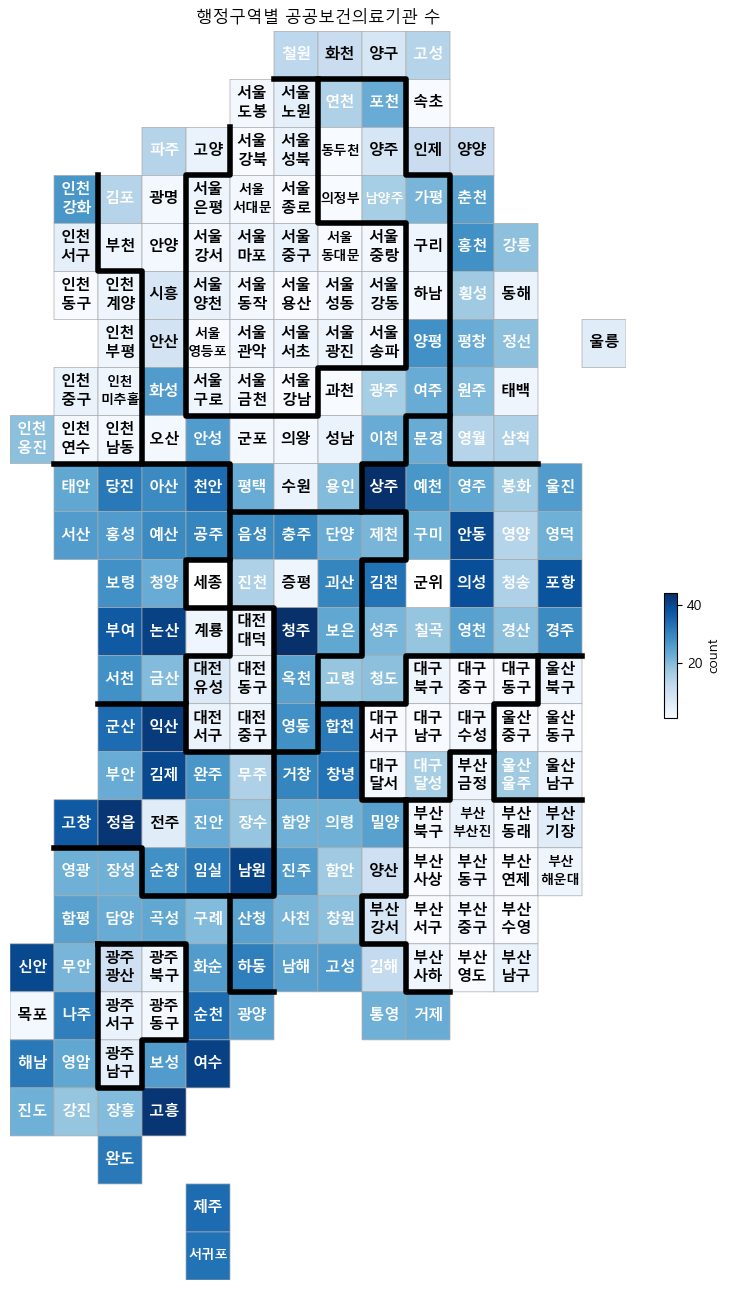

In [58]:
draw_blockMap(data_draw_korea_population_all, 'count', '행정구역별 공공보건의료기관 수', 'Blues')

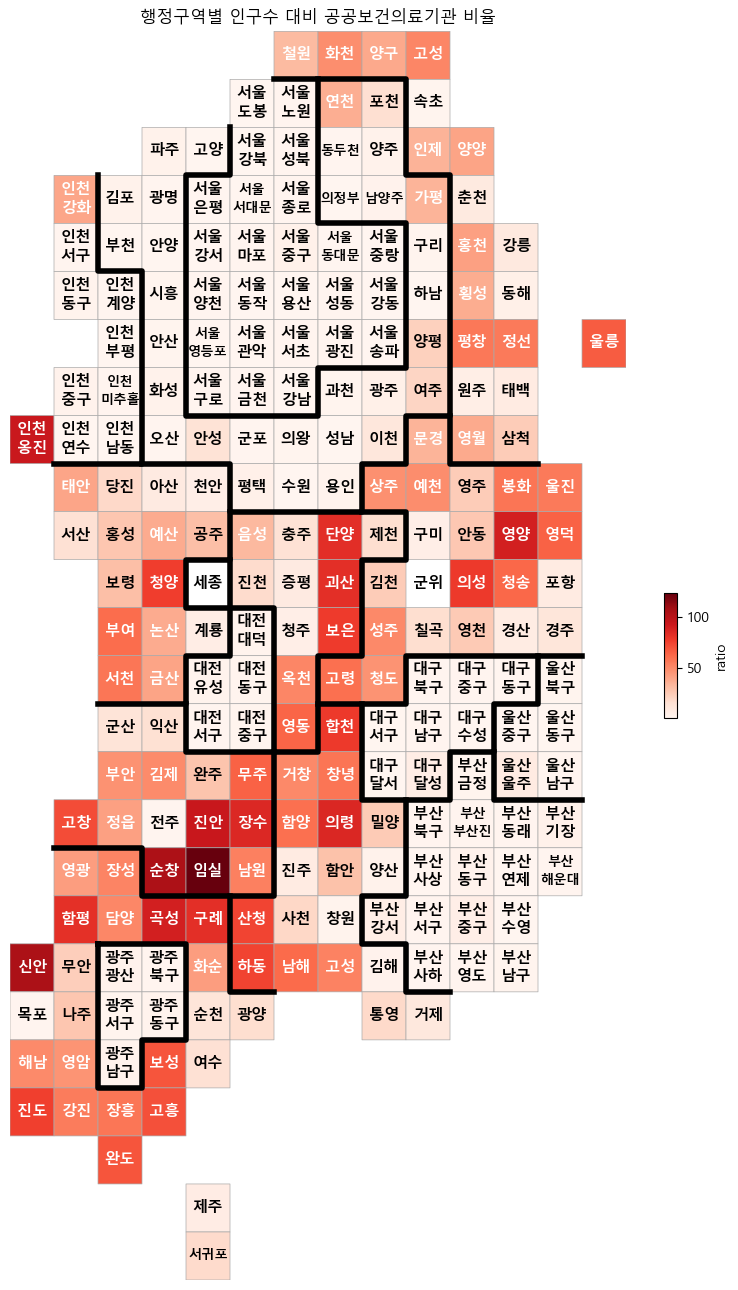

In [59]:
draw_blockMap(data_draw_korea_population_all, 'ratio', '행정구역별 인구수 대비 공공보건의료기관 비율', 'Reds')

In [60]:
import pandas as pd
df = pd.read_csv('인구수별공공의료기관수.csv')
df[:10]

,시도군구,시도,군구,count,총인구수,ratio
0,강원특별자치도 강릉시,강원특별자치도,강릉시,19,209174,9.083347
1,강원특별자치도 고성군,강원특별자치도,고성군,14,27294,51.293325
2,강원특별자치도 동해시,강원특별자치도,동해시,4,88591,4.515131
3,강원특별자치도 삼척시,강원특별자치도,삼척시,15,62309,24.073569
4,강원특별자치도 속초시,강원특별자치도,속초시,1,82021,1.219200
5,강원특별자치도 양구군,강원특별자치도,양구군,8,20975,38.140644
6,강원특별자치도 양양군,강원특별자치도,양양군,11,27681,39.738449
7,강원특별자치도 영월군,강원특별자치도,영월군,14,37260,37.573806
8,강원특별자치도 원주시,강원특별자치도,원주시,20,361498,5.532534
9,강원특별자치도 인제군,강원특별자치도,인제군,11,32004,34.370704


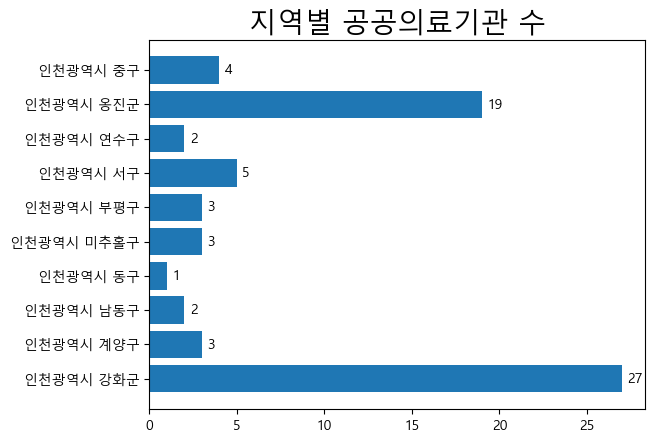

In [70]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('font', size =10)
plt.rc('axes', unicode_minus=False)
word='인천'
filt = df['시도군구'].str.contains(word)
df = df[filt]
if len(df) > 10 :
    df = df[:10]

plt.title('지역별 공공의료기관 수', size=20)
plt.barh(df['시도군구'], df['count'])
for idx, count in enumerate(df['count']):
    plt.text(count+0.3, idx, count, va='center')
plt.show()